In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1 style="text-align:center;font-size:30px;" > The RVL-CDIP Dataset </h1>

<h1 style="text-align:center;font-size:30px;" > WHAT I HAVE DONE IN THIS PART OF THE CASE STUDY IS THAT I HAVE USED A PIPELINE FOR THE ENTIRE PROJECT. I HAVE TAKEN A RAW IMAGE AS INPUT AND USED THE SAVED MODELS INORDER TO PREDICT THE OUTPUT OF THE RAW IMAGE I,E, PREDECIT AT WHICH CLASS THE IMAGE BELONGS TO OUT OF THE 16 classes </h1>

In [2]:
import tensorflow as tf
from keras.layers import Conv2D, Input, BatchNormalization, Dropout, Dense, GlobalAvgPool2D, GlobalMaxPooling2D, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, Adagrad, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from keras.models import Model, load_model, model_from_json
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.vgg16 import VGG16
import joblib
#!pip install scipy==1.2.1
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab.patches import cv2_imshow
#import scipy
import cv2

Using TensorFlow backend.


In [0]:
def final_model(img):
  # We will load our model with their respective weights
  # Holistic Model Loading
  json_file = open('/content/model_ho.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model_holistic = model_from_json(loaded_model_json)
  # load weights into new model
  model_holistic.load_weights("/content/drive/My Drive/ content model_ho.h5")
  print("Loaded model from disk Holistic")

  # Header Region Specific Model Loading
  json_file = open('/content/drive/My Drive/rvl-cdip/model_hea.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model_header = model_from_json(loaded_model_json)
  # load weights into new model
  model_header.load_weights("/content/drive/My Drive/ content model_hea.h5")
  print("Loaded model from disk Header")

  # Bottom Region Specific Trained Model Loading
  json_file = open('/content/drive/My Drive/rvl-cdip/model_bo.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model_bottom = model_from_json(loaded_model_json)
  # load weights into new model
  model_bottom.load_weights("/content/drive/My Drive/ content model_bo.h5")
  print("Loaded model from disk Bottom")

  # Left Region Specific Trained Model Loading
  json_file = open('/content/drive/My Drive/rvl-cdip/model_le.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model_left = model_from_json(loaded_model_json)
  # load weights into new model
  model_left.load_weights("/content/drive/My Drive/ content model_le.h5")
  print("Loaded model from disk Left")

  # Right Region Specific Trained Model Loading
  json_file = open('/content/drive/My Drive/rvl-cdip/model_ri .json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model_right = model_from_json(loaded_model_json)
  # load weights into new model
  model_right.load_weights("/content/drive/My Drive/ content model_ri.h5")
  print("Loaded model from disk Right")


  # Loading the final model
  json_file = open('/content/drive/My Drive/ content model_fial.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model_final = model_from_json(loaded_model_json)
  # load weights into new model
  model_final.load_weights("/content/drive/My Drive/ content model_fial.h5")
  print("Loaded the final model from disk")
  img = plt.imread(img)
  plt.imshow(img)
  img_whole = cv2.resize(img,(256,256))
  img_header = img[:256,:,:]
  #plt.imshow(img_header)
  img_header_ = cv2.resize(img_header,(256,256))
  img_bottom = img[-256:,:,:]
  img_bottom_ = cv2.resize(img_bottom,(256,256))
  #plt.imshow(img_bottom_)
  img_right = img[:,-256:,:]
  img_right_ = cv2.resize(img_right,(256,256))
  #plt.imshow(img_right_)
  img_left = img[:,:256,:]
  img_left_ = cv2.resize(img_left,(256,256))
  #plt.imshow(img_left_)
  img_whole = np.reshape(img_whole,[1,256,256,3])/255.
  img_whole.shape 
  features_whole = model_holistic.predict(img_whole)
  features_whole.shape
  img_bottom_= np.reshape(img_bottom_,[1,256,256,3])/255.
  features_bottom = model_bottom.predict(img_bottom_)
  features_bottom.shape
  img_header_= np.reshape(img_header_,[1,256,256,3])/255.
  features_header = model_header.predict(img_header_)
  features_header.shape
  img_left_= np.reshape(img_left_,[1,256,256,3])/255.
  features_left = model_left.predict(img_left_)
  features_left.shape
  img_right_= np.reshape(img_right_,[1,256,256,3])/255.
  features_right = model_right.predict(img_right_)
  features_right.shape
  store = np.hstack((features_whole,features_header,features_bottom,features_left,features_right))
  print(store.shape)
  yihat= model_final.predict(store)
  y=yihat
  pos=np.argmax(y, axis=1)
  v=y.tolist()
  maxpos = v[0].index(max(v[0]))
  label = {0:"letter",1:"form",2:"email",3:"handwritten",4:"advertisement",
         5:"scientific report",6:"scientific publication",7:"specification",
         8:"file folder",9:"news article",10:"budget",11:"invoice",12:"presentation",
         13:"questionnaire",14:"resume",15:"memo"}
  if maxpos in label:
      l=(label[maxpos])
  return l;

  
  


In [4]:
!wget https://images.template.net/wp-content/uploads/2017/06/library-research-paper.jpg

--2019-11-22 16:08:01--  https://images.template.net/wp-content/uploads/2017/06/library-research-paper.jpg
Resolving images.template.net (images.template.net)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to images.template.net (images.template.net)|151.101.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155533 (152K) [image/jpeg]
Saving to: ‘library-research-paper.jpg’

library-research-pa 100%[===================>] 151.89K  --.-KB/s    in 0.04s   

2019-11-22 16:08:01 (3.92 MB/s) - ‘library-research-paper.jpg’ saved [155533/155533]



In [10]:
!wget https://i1.rgstatic.net/publication/271488982_Review_of_chart_recognition_in_document_images/links/5abc4dc5aca27222c75375bb/largepreview.png

--2019-11-22 16:14:10--  https://i1.rgstatic.net/publication/271488982_Review_of_chart_recognition_in_document_images/links/5abc4dc5aca27222c75375bb/largepreview.png
Resolving i1.rgstatic.net (i1.rgstatic.net)... 13.225.176.68, 13.225.176.100, 13.225.176.125, ...
Connecting to i1.rgstatic.net (i1.rgstatic.net)|13.225.176.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132505 (129K) [image/png]
Saving to: ‘largepreview.png’

largepreview.png    100%[===================>] 129.40K  --.-KB/s    in 0.09s   

2019-11-22 16:14:11 (1.35 MB/s) - ‘largepreview.png’ saved [132505/132505]



In [0]:
img1 = plt.imread('/content/library-research-paper.jpg')

In [0]:
img2= plt.imread('/content/img1.tif')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Loaded model from disk Holistic
Loaded model from disk Header
Loaded model from disk Bottom
Loaded model from disk Left
Loaded model from disk Right
Loaded the final model from disk
(1, 80)
presentation


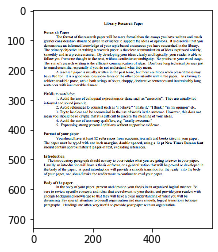

In [6]:
y=final_model(img1)
print(y)

In [0]:
img2 = plt.imread("/content/largepreview.png")

Loaded model from disk Holistic
Loaded model from disk Header
Loaded model from disk Bottom
Loaded model from disk Left
Loaded model from disk Right
Loaded the final model from disk
(1, 80)
handwritten


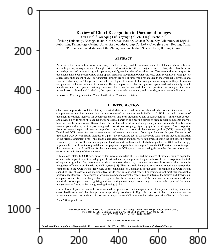

In [14]:
y=final_model("/content/largepreview.png")
print(y)


Loaded model from disk Holistic
Loaded model from disk Header
Loaded model from disk Bottom
Loaded model from disk Left
Loaded model from disk Right
Loaded the final model from disk
(1, 80)
email


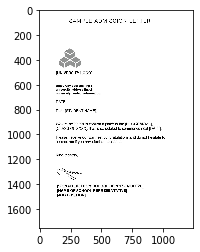

In [16]:
y=final_model("/content/Proof-of-admission-letter.jpg")
print(y)

In [15]:
!wget https://cdn0.scrvt.com/8b7b5f6328a4ae611f2a8b95cfbba390/3fdd1ec01cde8862/9408a023ba41/v/b803bc9e5f83/Proof-of-admission-letter.jpg

--2019-11-22 16:27:04--  https://cdn0.scrvt.com/8b7b5f6328a4ae611f2a8b95cfbba390/3fdd1ec01cde8862/9408a023ba41/v/b803bc9e5f83/Proof-of-admission-letter.jpg
Resolving cdn0.scrvt.com (cdn0.scrvt.com)... 13.32.52.81, 13.32.52.103, 13.32.52.95, ...
Connecting to cdn0.scrvt.com (cdn0.scrvt.com)|13.32.52.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102240 (100K) [image/jpeg]
Saving to: ‘Proof-of-admission-letter.jpg’

Proof-of-admission- 100%[===================>]  99.84K   226KB/s    in 0.4s    

2019-11-22 16:27:05 (226 KB/s) - ‘Proof-of-admission-letter.jpg’ saved [102240/102240]

